# 1. Predicting temperature

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. You will download the dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings('ignore')

In [2]:
weather_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/weatherHistory.csv")
weather_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [4]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

- Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing and pressure. Estimate the model using OLS.

In [5]:
X = weather_df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']]
Y = weather_df['Temperature (C)']
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Temperature (C)   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:38:23   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     37.9264      0.233    162.709      0.000      37.470      38.383
Humidity                 -32.4962      0.123   -264.288      0.000     -32.737     -32.255
Wind Speed (km/h)         -0.2014      0.003    -57.557      0.000      -0.208      -0.195
Wind Bearing (degrees)     0.0040      0.000     18.463      0.000       0.004       0.004
Pressure (millibars)      -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

__Assumption one : Linearity of the model in the coefficients__

In [7]:
prediction = results.predict(X)

Özelliklerimizin hedef değişkeni nasıl etkilediğini görmek için grafiklere baktığımızda bazılarında ilişki tespit edebilirken bazı grafikleri yorumlayamayabiliriz. Hedef değişken üzerinde tüm özelliklerin etkisi olduğu için yorumlamak istediğimiz özellik ile hedef değişken arasındaki ilişkiyi göremeyebiliriz. Özellik ile hedef değişken arasındaki ilişki incelenirken diğer tüm özelliklerin her örnek için aynı olmasını sağlayarak ilişki daha kolay yorumlanabilir.

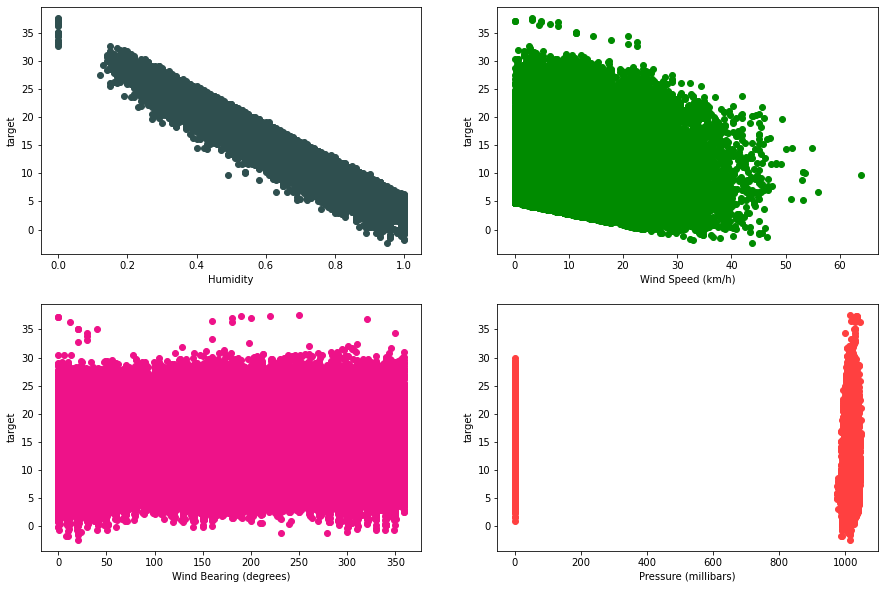

In [8]:
feature = ['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']
coefficient = [-32.4962 , -0.2014 , 0.0040 , -0.0007]
color = ['#FF4040' , '#2F4F4F' ,'#008B00' ,'#EE1289']
i = 1 
plt.figure(figsize=(15,10))
for column , coeff in zip(feature,coefficient):
    plt.subplot(2,2,i)
    plt.scatter(weather_df[column] , prediction , color = color[i%4])
    plt.xlabel(column)
    plt.ylabel('target')
    i += 1
plt.show()

İncelediğimiz özellik dışındaki tüm özellikleri sıfır olarak kabul edersek hedef değişken üzerinde sadece incelediğimiz özelliğin etkisi olur. Örneğin 'Humidity' özelliğinde diğer tüm özelliklerin aynı şartlarda olduğunu düşündüğümüzde bağıl(oransal) nem arttıkça sıcaklığın azaldığını görüyoruz.

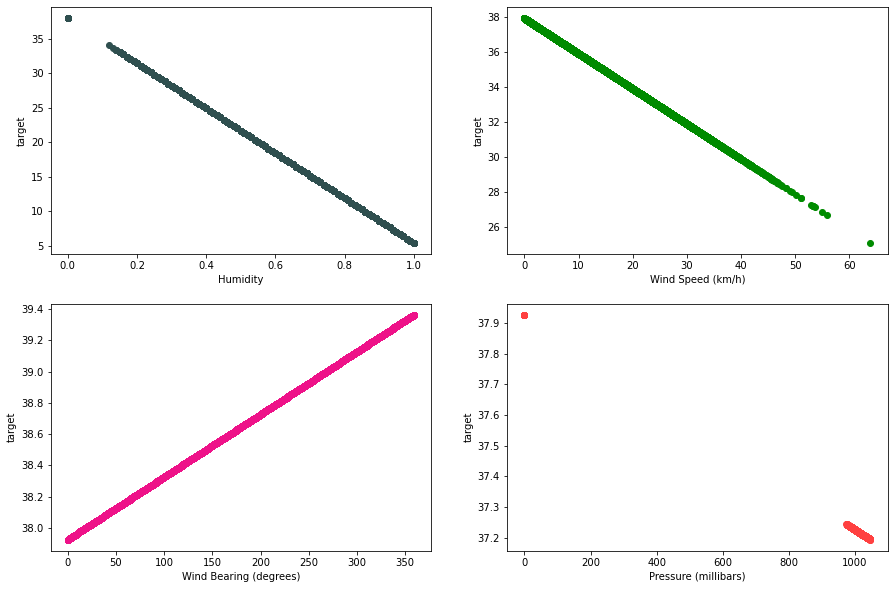

In [9]:
feature = ['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)']
coefficient = [-32.4962 , -0.2014 , 0.0040 , -0.0007]
color = ['#FF4040' , '#2F4F4F' ,'#008B00' ,'#EE1289']
i = 1 
plt.figure(figsize=(15,10))
for column , coeff in zip(feature,coefficient):
    plt.subplot(2,2,i)
    plt.scatter(weather_df[column] , weather_df[column] * coeff + 37.9264 , color = color[i%4])
    plt.xlabel(column)
    plt.ylabel('target')
    i += 1
plt.show()

__Assumption two : The error term should be zero on average__

In [10]:
errors = Y - prediction
print('mean of errors : {}'.format(np.mean(errors)))

mean of errors : 1.0387153180693518e-11


__Assumption three : Homoscedasticity__

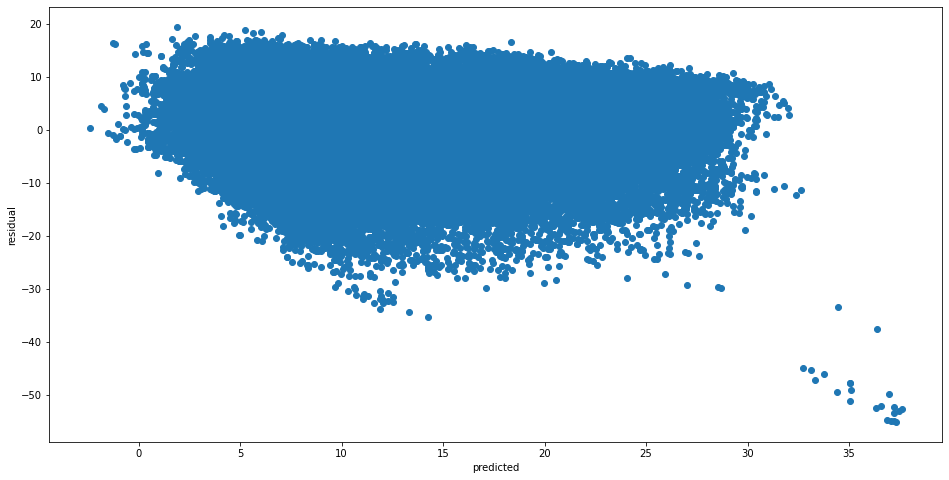

In [11]:
plt.figure(figsize=(16,8))
plt.scatter(prediction , errors)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

In [12]:
from scipy.stats import bartlett
from scipy.stats import levene
bar_stats = bartlett(prediction , errors)
lev_stats = levene(prediction , errors)
print('bartlett p-value : {}'.format(bar_stats[1]))
print('levene p-value : {}'.format(lev_stats[1]))

bartlett p-value : 0.0
levene p-value : 0.0


__Assumption four : Low multicollinearity__

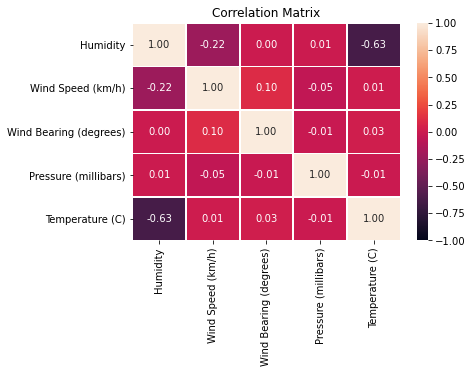

In [13]:
corr = weather_df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)','Temperature (C)']].corr()
plt.figure()
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.8 , vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

__Assumption five : Error terms should be uncorrelated with one other__

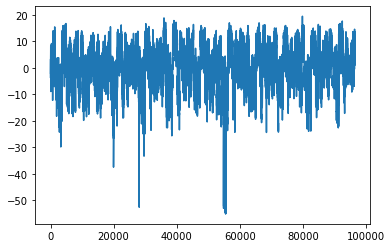

In [14]:
plt.figure()
plt.plot(errors)
plt.show()

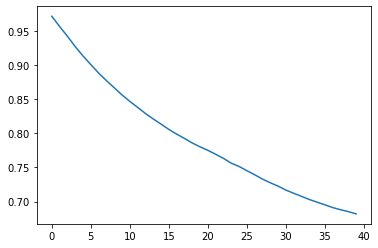

In [15]:
from statsmodels.tsa.stattools import acf
plt.figure()
acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

__Assumption six : Features shouldn't be correlated with the errors__

Açıklayıcı değişken ile hatalar bağımsız olmalıdır. Bu varsayım geçerli değilse katsayıların tahminleri yanlı olacağından modelin tahminleri güvenilmez olacaktır.

__A very important remark on the normality of the errors__

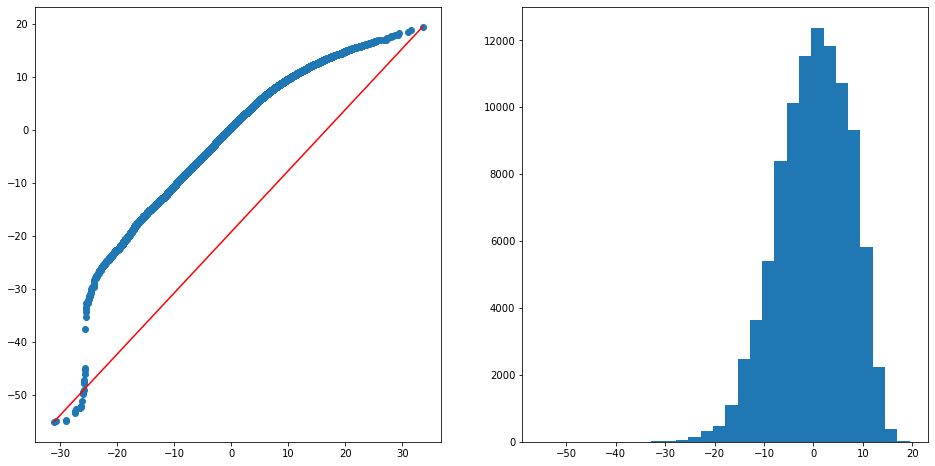

In [16]:
normal = np.random.normal(np.mean(errors) , np.std(errors) , len(errors))
normal.sort()
errors = errors.sort_values()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(normal , errors) 
plt.plot([np.min(normal) , np.max(normal)] , [np.min(errors) , np.max(errors)] , color = 'red')
plt.subplot(1,2,2)
plt.hist(errors, bins = 30)
plt.show()

In [17]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest
jb_stats = jarque_bera(errors)
normal_stats = normaltest(errors)
print("jarque bera p-value : {}".format(jb_stats[1]))
print("normal test p-value : {}".format(normal_stats[1]))

jarque bera p-value : 0.0
normal test p-value : 0.0


# 2. House prices

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

In [18]:
house_price = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


- Reimplement the model you built in the previous lesson.

In [19]:
house_price = house_price[['LotArea','BldgType','GrLivArea','YearBuilt', 'OverallQual', 
                 'TotalBsmtSF', 'GarageCars','SalePrice']]

In [20]:
for col in house_price.select_dtypes(include='object'):
    df = pd.DataFrame(house_price[col].unique())
    df.columns = [col]
    for i in house_price[col].unique():
        house_price.loc[house_price[col] == i , col+'_num'] = df[df[col] == i ].index[0]

In [21]:
Y = house_price['SalePrice']
X = house_price[['BldgType_num','LotArea','GrLivArea','YearBuilt','OverallQual' , 
                 'TotalBsmtSF', 'GarageCars']]
X = sm.add_constant(X)
results = sm.OLS(Y , X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     734.5
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        21:43:35   Log-Likelihood:                -17439.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1452   BIC:                         3.494e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.204e+05   8.49e+04     -9.666      0.000   -9.87e+05   -6.54e+05
BldgType_num -6095.9478    970.552     -6.281      0.000   -7999.782   -4192.114
LotArea          0.5426      0.106      5.136      0.000       0.335       0.750
GrLivArea       47.1553      2.544     18.537      0.000      42.165      52.145
YearBuilt      379.2687     44.641      8.496      0.000     291.701     466.837
OverallQual   2.126e+04   1134.320     18.746      0.000     1.9e+04    2.35e+04
TotalBsmtSF     25.0935      2.816      8.912      0.000      19.570      30.617
GarageCars      1.3e+04   1785.862      7.280      0.000    9498.425    1.65e+04
==============================================================================
Omnibus:                      450.238   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55732.441
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                      33.264   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.

__Assumption one : Linearity of the model in the coefficients__

In [22]:
prediction = results.predict(X)
house_price['prediction'] = prediction

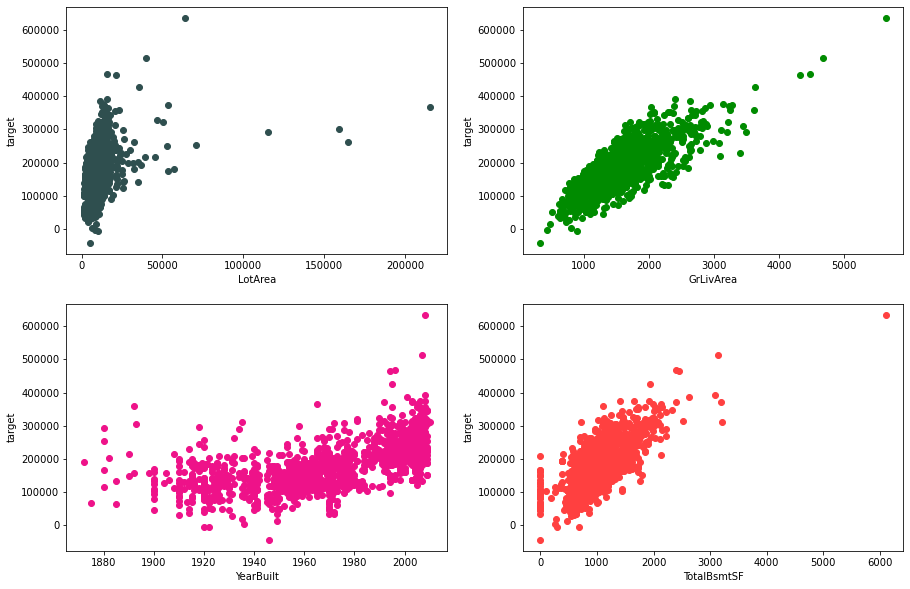

In [23]:
feature = ['LotArea','GrLivArea','YearBuilt',  'TotalBsmtSF']
coefficient = [ 0.5426 ,  47.1553 , 379.2687 , 25.0935 ]
color = ['#FF4040' , '#2F4F4F' ,'#008B00' ,'#EE1289']
i = 1 
plt.figure(figsize=(15,10))
for column , coeff in zip(feature,coefficient):
    plt.subplot(2,2,i)
    plt.scatter(house_price[column] , prediction , color = color[i%4])
    plt.xlabel(column)
    plt.ylabel('target')
    i += 1
plt.show()

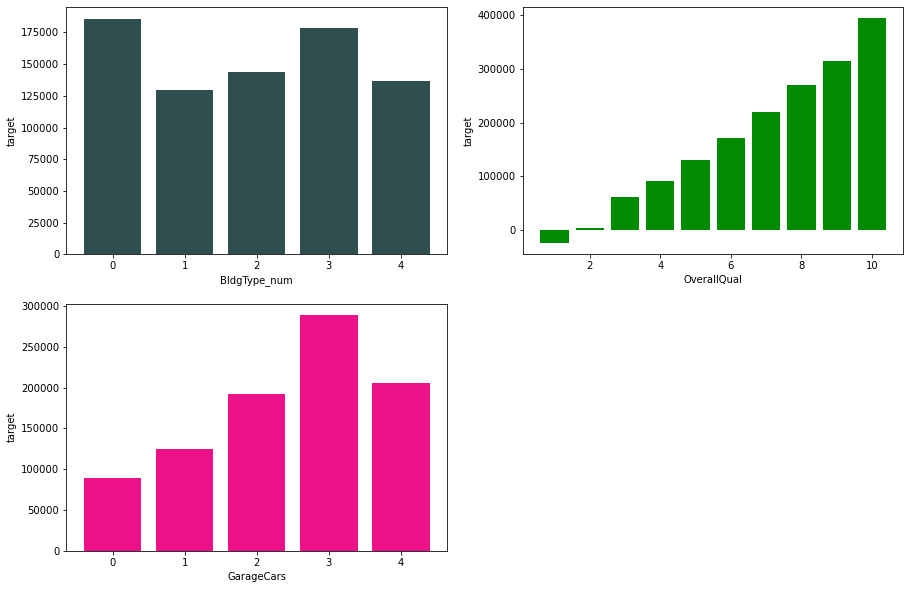

In [24]:
feature = ['BldgType_num','OverallQual', 'GarageCars']
coefficient = [-6095.9478 , 2.126e+04 , 1.3e+04 ]
color = ['#FF4040' , '#2F4F4F' ,'#008B00' ,'#EE1289']
i = 1 
plt.figure(figsize=(15,10))
for column , coeff in zip(feature,coefficient):
    plt.subplot(2,2,i)
    plt.bar(house_price.groupby(by=column)['SalePrice'].mean().index , 
        house_price.groupby(by=column)['prediction'].mean() , color = color[i%4])
    plt.xlabel(column)
    plt.ylabel('target')
    i += 1
plt.show()

__Assumption two : The error term should be zero on average__

In [25]:
errors = Y - prediction
print('mean of errors : {}'.format(np.mean(errors)))

mean of errors : -5.1387397521366815e-09


__Assumption three : Homoscedasticity__

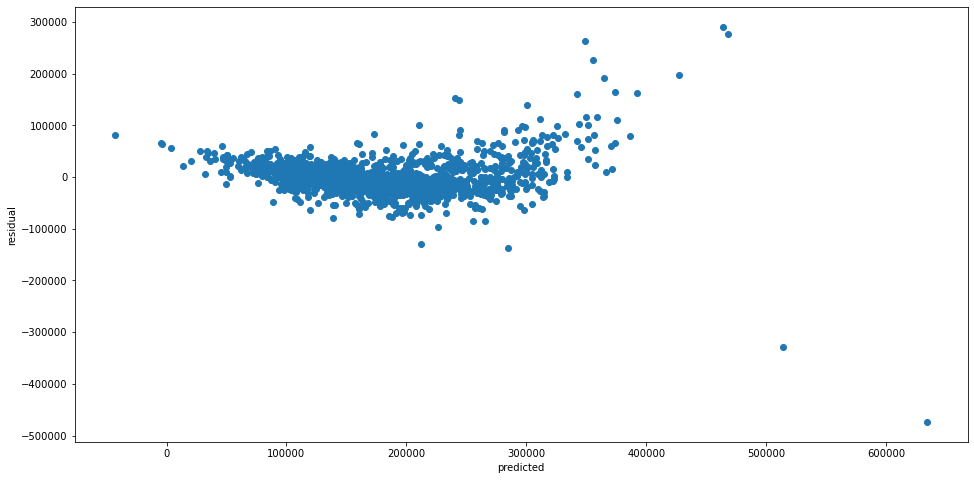

In [26]:
plt.figure(figsize=(16,8))
plt.scatter(prediction , errors)
plt.xlabel('predicted')
plt.ylabel('residual')
plt.show()

In [27]:
bar_stats = bartlett(prediction , errors)
lev_stats = levene(prediction , errors)
print('bartlett p-value : {}'.format(bar_stats[1]))
print('levene p-value : {}'.format(lev_stats[1]))

bartlett p-value : 3.7215041073642905e-121
levene p-value : 1.412500738471888e-114


__Assumption four : Low multicollinearity__

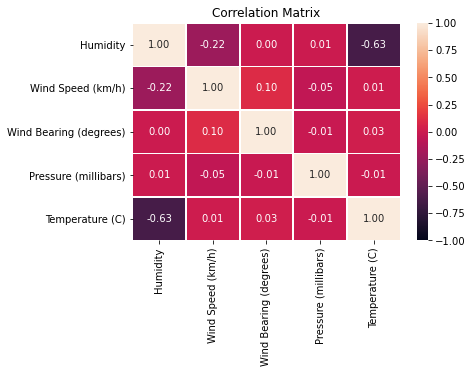

In [28]:
corr = weather_df[['Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Pressure (millibars)','Temperature (C)']].corr()
plt.figure()
sns.heatmap(corr, annot=True, fmt='.2f', annot_kws={"size": 10}, linewidths=.8 , vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

__Assumption five : Error terms should be uncorrelated with one other__

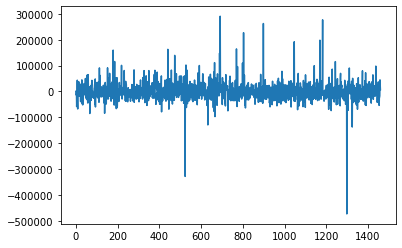

In [30]:
plt.figure()
plt.plot(errors)
plt.show()

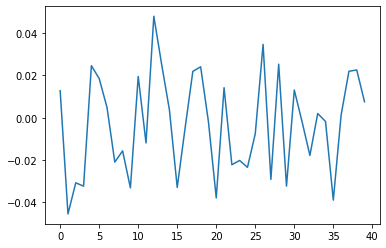

In [31]:
plt.figure()
acf_data = acf(errors)
plt.plot(acf_data[1:])
plt.show()

__A very important remark on the normality of the errors__

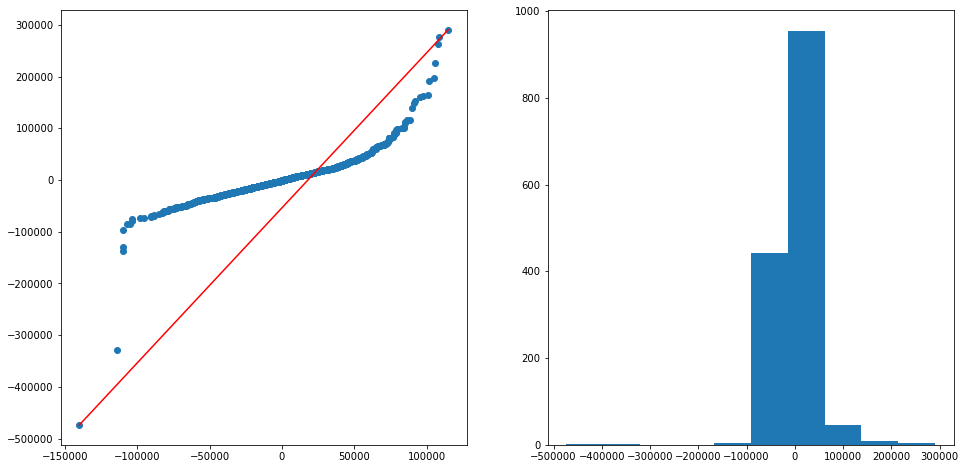

In [32]:
normal = np.random.normal(np.mean(errors) , np.std(errors) , len(errors))
normal.sort()
errors = errors.sort_values()
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(normal , errors) 
plt.plot([np.min(normal) , np.max(normal)] , [np.min(errors) , np.max(errors)] , color = 'red')
plt.subplot(1,2,2)
plt.hist(errors)
plt.show()

In [33]:
jb_stats = jarque_bera(errors)
normal_stats = normaltest(errors)
print("jarque bera p-value : {}".format(jb_stats[1]))
print("normal test p-value : {}".format(normal_stats[1]))

jarque bera p-value : 0.0
normal test p-value : 1.7061318800033967e-98
